In [8]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("random_data.csv")
df

,Light,Sound
0,9.186617,16.368901
1,17.316643,26.848497
2,17.700075,14.892181
3,8.821058,18.690935
4,16.156267,22.765046
5,12.644041,14.262814
6,5.437776,19.645106
7,5.276296,23.245513
8,16.253248,24.153325
9,5.212564,15.582505


Text(0, 0.5, 'Sound')

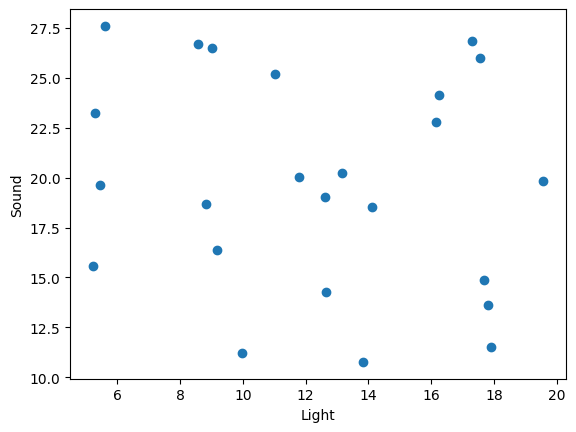

In [6]:
plt.scatter(df.Light, df.Sound)
plt.xlabel("Light")
plt.ylabel("Sound")

In [12]:
scaler = MinMaxScaler() 
a = scaler.fit(df.iloc[:,:])

In [13]:
a

MinMaxScaler()

In [15]:
df[['Light_T', 'Sound_T']] = a.transform(df.iloc[:,:])

In [16]:
df

,Light,Sound,Light_T,Sound_T
0,9.186617,16.368901,0.276611,0.332815
1,17.316643,26.848497,0.842496,0.955742
2,17.700075,14.892181,0.869184,0.245036
3,8.821058,18.690935,0.251167,0.470841
4,16.156267,22.765046,0.761729,0.713014
5,12.644041,14.262814,0.517263,0.207625
6,5.437776,19.645106,0.015676,0.527559
7,5.276296,23.245513,0.004436,0.741574
8,16.253248,24.153325,0.768479,0.795536
9,5.212564,15.582505,0.000000,0.286070


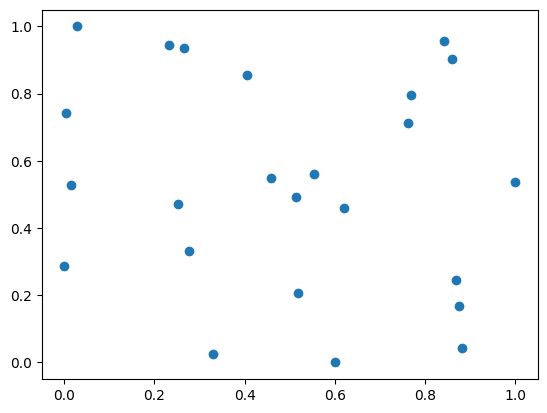

In [17]:
plt.scatter(df.Light_T, df.Sound_T)

In [18]:
from sklearn.cluster import KMeans

In [20]:
sse = [] 
k_range = range(1,11)

for i in k_range: 
    km = KMeans(n_clusters=i)
    km.fit(df[['Light_T','Sound_T']])
    sse.append(km.inertia_)

In [21]:
sse

[4.651797925131367,
 2.8173521676702475,
 1.6996527126424992,
 1.3388721510474981,
 0.8070083367983407,
 0.5117152107727563,
 0.4645362707021231,
 0.3753043978981347,
 0.30705056367668965,
 0.25542665934365055]

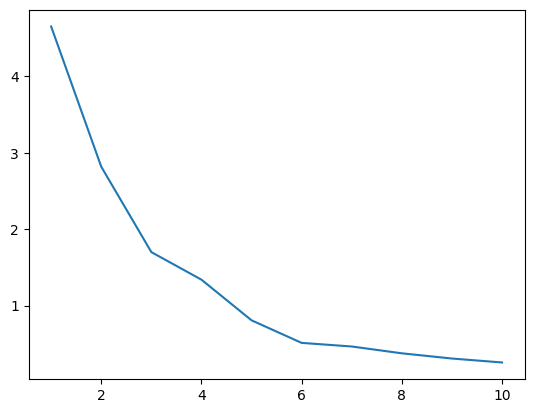

In [22]:
plt.plot(k_range, sse)

In [23]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Light_T', 'Sound_T']])
y_predicted

array([1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1,
       0, 2], dtype=int32)

In [24]:
df['cluster'] = y_predicted

In [25]:
df

,Light,Sound,Light_T,Sound_T,cluster
0,9.186617,16.368901,0.276611,0.332815,1
1,17.316643,26.848497,0.842496,0.955742,0
2,17.700075,14.892181,0.869184,0.245036,1
3,8.821058,18.690935,0.251167,0.470841,1
4,16.156267,22.765046,0.761729,0.713014,0
5,12.644041,14.262814,0.517263,0.207625,1
6,5.437776,19.645106,0.015676,0.527559,2
7,5.276296,23.245513,0.004436,0.741574,2
8,16.253248,24.153325,0.768479,0.795536,0
9,5.212564,15.582505,0.000000,0.286070,1


In [26]:
df1 = df[df.cluster==0] 
df2 = df[df.cluster==1] 
df3 = df[df.cluster==2] 

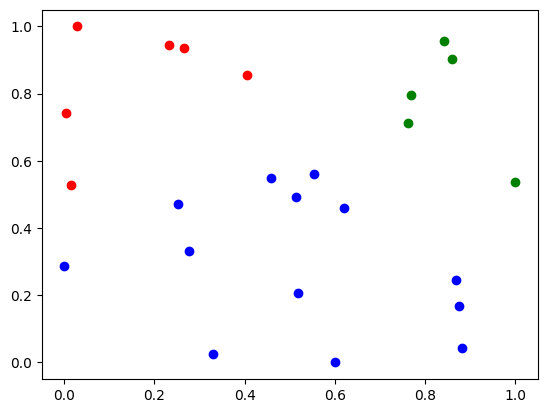

In [27]:
plt.scatter(df1.Light_T, df1.Sound_T, color="green")
plt.scatter(df2.Light_T, df2.Sound_T, color="blue")
plt.scatter(df3.Light_T, df3.Sound_T, color="red")